In [440]:
! pip install streamlit
! pip install pymongo
! pip install pandas

You should consider upgrading via the 'c:\users\fred\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\fred\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\fred\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [441]:
import streamlit as st
from pymongo import MongoClient
import pandas as pd
import os
import numpy as np
import datetime
from calendar import monthrange
from datetime import timezone, timedelta
import time
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import plotly.express as px

In [442]:
with open('C:/Users/Fred/OneDrive/Documentos/FREDERICO/Frederico/6 python_dev/evolucao_basquete/credentials.txt', 'r') as file:
    lines = file.readlines()
    if len(lines) >= 3:
        CLIENT_TOKEN = lines[2].strip().split()
    else:
        print('sem CLIENT_TOKEN')

In [443]:
def connect_to_mongodb():
    """
    Function to connect to mongoDB
    """
    global collection
    # client = os.getenv('CLIENT_TOKEN')
    # myclient = MongoClient(client)
    myclient = MongoClient(CLIENT_TOKEN)
    db = myclient.get_database('db_evolucao_basquete')
    collection = db.collection_evolucao_basquete
    return collection

In [444]:
collection = connect_to_mongodb()

In [445]:
def retrieve_data_from_mongodb():
    global data_list
    """
    Function to get all information from mongodb.
    """
    data_list = []
    data_list = [x for x in collection.find()]
    return data_list

In [446]:
data_list = retrieve_data_from_mongodb()
def transform_to_dataframe():
    data_list = retrieve_data_from_mongodb()
    df_data_list = pd.DataFrame(data_list)
    return df_data_list

In [447]:
df_data_list = transform_to_dataframe()

In [448]:
df_data_list = df_data_list.fillna(value=np.nan)

In [449]:
df_data_list['dia'] = df_data_list['dia'].astype('datetime64[ns]')
df_data_list['hora_do_jogo'] = pd.to_datetime(df_data_list['hora_do_jogo'],format= '%H:%M').dt.time
df_data_list['tempo_de_descanso'] = pd.to_numeric(df_data_list['tempo_de_descanso'], errors='coerce')
df_data_list['nota'] = pd.to_numeric(df_data_list['nota'], errors='coerce')
df_data_list['pai'] = pd.to_numeric(df_data_list['pai'], errors='coerce')
df_data_list['calorias'] = pd.to_numeric(df_data_list['calorias'], errors='coerce')
df_data_list['tempo_jogado'] = pd.to_numeric(df_data_list['tempo_jogado'], errors='coerce')
df_data_list['animo_pra_jogar'] = pd.to_numeric(df_data_list['animo_pra_jogar'], errors='coerce')

In [450]:
df_data_list['calorias_por_min'] = df_data_list['calorias']/df_data_list['tempo_jogado']

In [451]:
df_data_list['numero_da_semana'] = df_data_list['dia'].apply(lambda x: datetime.date.isocalendar(x)[1])

In [452]:
df_data_list_fred = df_data_list.query('jogador == "Fred"').sort_values(by='dia', ascending=False)

In [453]:
df_data_list_bia = df_data_list.query('jogador == "Bia"').sort_values(by='dia', ascending=False)

# KPIs

In [454]:
df_data_list_fred

,_id,jogador,dia,hora_do_jogo,tempo_de_descanso,jogou_sozinho,ouviu_musica,nota,pai,calorias,tempo_jogado,animo_pra_jogar,sentimento_do_dia,calorias_por_min,numero_da_semana
35,649a34ba9f3bcd9f9943dc46,Fred,2023-06-26,12:30:00,0,não,não,8.0,35,653,56,7.0,Meh,11.660714,26
34,64950503e237f2af8d243c4f,Fred,2023-06-21,21:45:00,0,não,não,8.0,8,451,48,8.0,Animado,9.395833,25
32,64938064e237f2af8d243c4a,Fred,2023-06-20,21:15:00,0,sim,não,9.0,4,176,18,10.0,Animado,9.777778,25
30,6491ec8fe237f2af8d243c3c,Fred,2023-06-20,12:14:00,5,não,não,7.0,22,651,61,8.0,Entusiasmado,10.672131,25
27,648d26a6ee84afa912c1466f,Fred,2023-06-16,22:15:00,0,não,não,7.0,28,696,61,8.0,Cansado,11.409836,24
26,648a947bee84afa912c1466b,Fred,2023-06-14,20:30:00,3,não,não,3.0,25,742,68,9.0,Entusiasmado,10.911765,24
25,6478cafc3e5cd7e83594a7ae,Fred,2023-06-01,12:30:00,0,não,não,9.0,47,891,78,9.0,Entusiasmado,11.423077,22
14,647695f03e5cd7e83594a78c,Fred,2023-05-30,20:30:00,0,não,não,6.0,12,657,67,5.0,Meh,9.805970,22
12,64755072c3a73b3d1379967e,Fred,2023-05-29,21:30:00,2,não,não,7.0,20,755,65,8.0,Triste,11.615385,22
6,6474257e1a1510fe3c358b13,Fred,2023-05-26,21:27:00,4,sim,sim,8.0,33,813,74,8.0,animado,10.986486,21


In [455]:
# Dias que jogou
len(df_data_list_fred['dia'])

21

In [456]:
today = datetime.datetime.now() - datetime.timedelta(hours=3)

In [457]:
current_week = datetime.date.isocalendar(today)[1]

# Dias que jogou essa semana
df_games_by_week = (pd.DataFrame(df_data_list_fred['numero_da_semana'].value_counts().sort_index(ascending = False))).reset_index()
df_games_by_week = df_games_by_week.rename(columns={'numero_da_semana':'qtd_jogos', 'index':'numero_da_semana'})

In [463]:
df_games_this_week = df_games_by_week.query(f'numero_da_semana == {current_week}')['qtd_jogos'][0]

if df_games_this_week == 0:
    print('sem jogos essa semana')
else:
    print(df_games_this_week)

1


In [464]:
###################################################################
def data_transformation(dataframe):
    """
    Edit the columns, create new metrics and separate into new dataframes
    """
    # Transforming all empty into nan
    dataframe_transf = dataframe.fillna(value=np.nan)

    # Editing the types of the columns
    dataframe_transf['dia'] = dataframe_transf['dia'].astype('datetime64[ns]')
    dataframe_transf['hora_do_jogo'] = pd.to_datetime(dataframe_transf['hora_do_jogo'], errors='coerce').dt.time
    dataframe_transf['tempo_de_descanso'] = pd.to_numeric(dataframe_transf['tempo_de_descanso'], errors='coerce')
    dataframe_transf['nota'] = pd.to_numeric(dataframe_transf['nota'], errors='coerce')
    dataframe_transf['pai'] = pd.to_numeric(dataframe_transf['pai'], errors='coerce')
    dataframe_transf['calorias'] = pd.to_numeric(dataframe_transf['calorias'], errors='coerce')
    dataframe_transf['tempo_jogado'] = pd.to_numeric(dataframe_transf['tempo_jogado'], errors='coerce')
    dataframe_transf['animo_pra_jogar'] = pd.to_numeric(dataframe_transf['animo_pra_jogar'], errors='coerce')

    # Creating new metric "calorias_por_min"
    dataframe_transf['calorias_por_min'] = dataframe_transf['calorias']/dataframe_transf['tempo_jogado']

    # Creating a new column with the week number
    dataframe_transf['numero_da_semana'] = dataframe_transf['dia'].apply(lambda x: datetime.date.isocalendar(x)[1])

    # Separating into the player's dataframe_transfs
    df_data_list_fred = dataframe_transf.query('jogador == "Fred"').sort_values(by='dia', ascending=False)
    df_data_list_bia = dataframe_transf.query('jogador == "Bia"').sort_values(by='dia', ascending=False)

    return [df_data_list_fred, df_data_list_bia]

def main_metrics(dataframe, player):
    global specific_dataframe
    today = datetime.datetime.now() - datetime.timedelta(hours=3)
    current_week = datetime.date.isocalendar(today)[1]

    if player == 'Fred':
        df_index = 0
    elif player == 'Bia':
        df_index = 1
    
    specific_dataframe = data_transformation(dataframe)[df_index]
    df_current_week = specific_dataframe[specific_dataframe['numero_da_semana'] == current_week]
    jogos_essa_semana = len(df_current_week)

    return jogos_essa_semana

In [465]:
player = 'Bia'
df_all_info = df_data_list
a = data_transformation(df_data_list)
main_metrics(df_all_info, player)

0

In [466]:
import datetime
import pandas as pd

# Assuming the DataFrame is named 'df'
today = datetime.datetime.now() - datetime.timedelta(hours=3)
current_week = datetime.date.isocalendar(today)[1]




In [467]:
df_games_by_week[df_games_by_week['numero_da_semana'] == current_week]['qtd_jogos'][0]

1

In [468]:
df_grouped_by_week = pd.DataFrame(df_data_list_fred.groupby(by="numero_da_semana").mean()[['pai', 'nota', 'calorias', 'animo_pra_jogar']])
df_grouped_by_week['dias_jogados'] = df_data_list_fred.groupby(by='numero_da_semana').count()['jogador']
df_grouped_by_week = df_grouped_by_week.reset_index()

In [469]:
jogos_por_semana = pd.DataFrame(specific_dataframe['numero_da_semana'].value_counts())
jogos_por_semana = jogos_por_semana.reset_index()
jogos_por_semana = jogos_por_semana.rename(columns={'numero_da_semana':'qtd','index':'numero_da_semana'})
fig = px.bar(x=jogos_por_semana['numero_da_semana'], y=jogos_por_semana['qtd'])
# fig.show()
jogos_por_semana

,numero_da_semana,qtd
0,17,4
1,25,2
2,24,2
3,22,2
4,19,2
5,18,2
6,16,1


In [470]:
df_grouped_by_week

,numero_da_semana,pai,nota,calorias,animo_pra_jogar,dias_jogados
0,17,21.333333,6.666667,700.333333,NaN,3
1,18,22.500000,6.500000,711.500000,NaN,2
2,19,20.000000,6.500000,671.500000,NaN,2
3,20,15.000000,6.000000,287.000000,NaN,2
4,21,26.333333,7.500000,558.666667,7.333333,3
5,22,26.333333,7.333333,767.666667,7.333333,3
6,24,26.500000,5.000000,719.000000,8.500000,2
7,25,11.333333,8.000000,426.000000,8.666667,3
8,26,35.000000,8.000000,653.000000,7.000000,1


In [471]:
# import plotly.express as px

# # Assuming you have a DataFrame df_grouped_by_week with columns 'numero_da_semana', 'animo_pra_jogar', and 'nota'

# # Create a line chart with different colors for each line and custom legend text
# fig = px.line(df_grouped_by_week,
#               x='numero_da_semana',
#               y=['animo_pra_jogar', 'nota'],
#               color_discrete_sequence=['#FF7F0E', '#1F77B4'],
#               markers=True)

# # Set chart title and axis labels
# fig.update_layout(title=dict(text='Número de dias jogados por semana', font=dict(size=20, color='black', family='Arial bold,  sans-serif')),
#                   xaxis_title='número da semana',
#                   yaxis_title='nota')

# # Customize the legend
# fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="top",
#     y=1.05,
#     xanchor="center",
#     x=0.5,
#     bgcolor='rgba(255, 255, 255, 0.5)',
#     font=dict(size=12),
#     title=dict(text="", font=dict(size=14))
# ))

# fig.data[0].name = 'Animo Pra Jogar'
# fig.data[1].name = 'Nota'
# fig.update_layout(width=600, height=400)


# # Display the chart
# fig.show()


In [472]:
print("Dia que mais ganhou PAI: " + df_data_list_fred.query(f"pai == {df_data_list_fred['pai'].max()}")['dia'].dt.strftime('%Y-%m-%d').to_string(index=False))
print("Mais PAI ganho: " + df_data_list_fred.query(f"pai == {df_data_list_fred['pai'].max()}")['pai'].to_string(index=False))

Dia que mais ganhou PAI: 2023-06-01
Mais PAI ganho: 47


## Sequência de dias jogados/não jogados

In [473]:
df = df_data_list_fred[['dia']].copy()
df['dia'] = pd.to_datetime(df['dia'])
df.loc[len(df)] = today
df = df.sort_values('dia', ascending=False)
df['date_diff'] = df['dia'].diff()*-1

# Find the highest number of consecutive days
consecutive_days = (df['date_diff'] != pd.Timedelta(days=1)).cumsum()
consecutive_days_count = consecutive_days.value_counts()
max_streak = consecutive_days_count.max()

# Get the start and end dates of the highest streak
start_date = df.loc[consecutive_days.eq(consecutive_days_count.idxmax()), 'dia'].iloc[0]
end_date = df.loc[consecutive_days.eq(consecutive_days_count.idxmax()), 'dia'].iloc[max_streak - 1]

# Print the highest streak details
print("Maior sequência de jogos:", max_streak)
print("Começo da sequência:", start_date.date())
print("Fim da sequência:", end_date.date())
print("Há "+str(int((datetime.date.today() - end_date.date())/datetime.timedelta(days=1)))+" dias atrás")

Maior sequência de jogos: 2
Começo da sequência: 2023-05-26
Fim da sequência: 2023-05-25
Há 32 dias atrás


In [474]:
df.sort_values(by='dia')

,dia,date_diff
3,2023-04-25 00:00:00.000000,1 days 00:00:00
2,2023-04-26 00:00:00.000000,4 days 00:00:00
11,2023-04-30 00:00:00.000000,3 days 00:00:00
10,2023-05-03 00:00:00.000000,2 days 00:00:00
9,2023-05-05 00:00:00.000000,3 days 00:00:00
5,2023-05-08 00:00:00.000000,1 days 00:00:00
4,2023-05-09 00:00:00.000000,7 days 00:00:00
1,2023-05-16 00:00:00.000000,2 days 00:00:00
8,2023-05-18 00:00:00.000000,4 days 00:00:00
0,2023-05-22 00:00:00.000000,3 days 00:00:00


In [475]:
df_dias_nao_jogados = df.sort_values(by = 'date_diff', ascending = False)
primeiro_dia_da_sequencia_de_nao_jogados = df_dias_nao_jogados['dia'].iloc[0]
primeiro_dia_da_sequencia_de_nao_jogados_txt = primeiro_dia_da_sequencia_de_nao_jogados.strftime('%Y-%m-%d')
qtd_dias_da_sequencia_de_nao_jogados = df.sort_values(by = 'date_diff', ascending = False)['date_diff'].iloc[0]
ultimo_dia_da_sequencia_de_nao_jogados = primeiro_dia_da_sequencia_de_nao_jogados + qtd_dias_da_sequencia_de_nao_jogados
ultimo_dia_da_sequencia_de_nao_jogados_txt = ultimo_dia_da_sequencia_de_nao_jogados.strftime('%Y-%m-%d')
print("O dia em que a sequência de dias sem jogar começou: ", primeiro_dia_da_sequencia_de_nao_jogados_txt)
print("O dia em que a sequência de dias sem jogar terminou: ", ultimo_dia_da_sequencia_de_nao_jogados_txt)
print("Quantidade de dias da sequência que não jogou: ", qtd_dias_da_sequencia_de_nao_jogados)

O dia em que a sequência de dias sem jogar começou:  2023-06-01
O dia em que a sequência de dias sem jogar terminou:  2023-06-14
Quantidade de dias da sequência que não jogou:  13 days 00:00:00


## Calendário com dias jogados

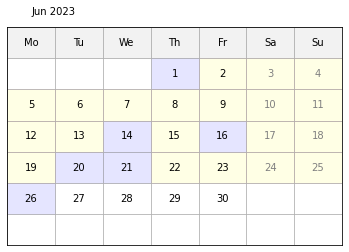

In [476]:
def label_month(year, month, ax, i, j, cl="black"):
    months = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
    month_label = f"{months[month-1]} {year}"
    ax.text(i, j, month_label, color=cl, va="center")


def label_weekday(ax, i, j, cl="black"):
    x_offset_rate = 1
    for weekday in ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]:
        ax.text(i, j, weekday, ha="center", va="center", color=cl)
        i += x_offset_rate
        ax.add_patch(
            patches.Rectangle(
            (i - 1.5, j - 0.5),
            1,
            1,
            edgecolor="gray",
            facecolor="gray",
            alpha=0.1,
            fill=True,
            )
        )


def label_day(ax, day, i, j, cl="black"):
    ax.text(i, j, int(day), ha="center", va="center", color=cl)


def pintar_dias_jogados(ax, i, j):
    ax.add_patch(
        patches.Rectangle(
            (i - 0.5, j - 0.5),
            1,
            1,
            edgecolor="blue",
            facecolor="blue",
            alpha=0.1,
            fill=True,
        )
    )


def pintar_dias_nao_jogados(ax, i, j):
    ax.add_patch(
        patches.Rectangle(
            (i - 0.5, j - 0.5),
            1,
            1,
            edgecolor="red",
            facecolor="yellow",
            alpha=0.1,
            fill=True,
        )
    )


def check_dias_jogados(year, month, day, weekday):
    if (month, day) in lista_dias_jogados:
        return True


def check_dias_nao_jogados(year, month, day, weekday):
    if (month, day) in lista_dias_nao_jogados_no_mes:
        return True


def check_color_day(year, month, day, weekday):
    if weekday == 6:  # Sunday
        return "gray"
    if weekday == 5:  # Saturday
        return "gray"
    return "black"


def month_calendar(ax, year, month, fill):
    date = datetime.datetime(year, month, 1)
    weekday, num_days = monthrange(year, month)
    # adjust by 0.5 to set text at the ceter of grid square
    x_start = 1 - 0.5
    y_start = 5 + 0.5
    x_offset_rate = 1
    y_offset = -1

    label_month(year, month, ax, x_start, y_start + 2)
    label_weekday(ax, x_start, y_start + 1)

    j = y_start

    for day in range(1, num_days + 1):
        i = x_start + weekday * x_offset_rate
        color = check_color_day(year, month, day, weekday)

        if fill and check_dias_jogados(year, month, day, weekday):
            pintar_dias_jogados(ax, i, j)

        if fill and check_dias_nao_jogados(year, month, day, weekday):
            pintar_dias_nao_jogados(ax, i, j)

        label_day(ax, day, i, j, color)
        weekday = (weekday + 1) % 7
        if weekday == 0:
            j += y_offset


def main(year, month, grid=True, fill=True):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.axis([0, 7, 0, 7])
    ax.axis("off")

    if grid:
        ax.axis("on")
        ax.grid(grid)
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)

        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
    month_calendar(ax, year, month, fill)
    plt.show()


if __name__ == "__main__":

    # pegando só os dias jogados de todos os meses
    lista_dias_jogados = [(i.date().month, i.date().day) for i in df_data_list_fred['dia']]

    # pegando só os dias não jogados no mês atual
    start_of_month = datetime.date(today.year, today.month, 1)
    filtered_dates = [(index, date) for index, date in df_data_list_fred['dia'].iteritems() if date.month == today.month]
    lista_dias_nao_jogados_no_mes = [(date.month, date.day) for date in pd.date_range(start_of_month, today) if date not in [date for _, date in filtered_dates]]

    year = datetime.date.today().year
    month = datetime.date.today().month
    main(year, month, grid=True, fill=True)

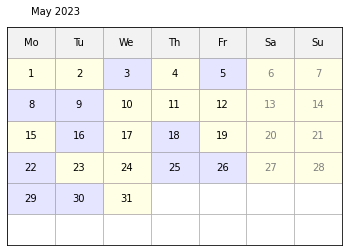

In [477]:
def label_month(year, month, ax, i, j, cl="black"):
    months = [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ]
    month_label = f"{months[month-1]} {year}"
    ax.text(i, j, month_label, color=cl, va="center")


def label_weekday(ax, i, j, cl="black"):
    x_offset_rate = 1
    for weekday in ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"]:
        ax.text(i, j, weekday, ha="center", va="center", color=cl)
        i += x_offset_rate
        ax.add_patch(
        patches.Rectangle(
        (i - 1.5, j - 0.5),
        1,
        1,
        edgecolor="gray",
        facecolor="gray",
        alpha=0.1,
        fill=True,
            )
        )


def label_day(ax, day, i, j, cl="black"):
    ax.text(i, j, int(day), ha="center", va="center", color=cl)


def pintar_dias_jogados(ax, i, j):
    ax.add_patch(
        patches.Rectangle(
            (i - 0.5, j - 0.5),
            1,
            1,
            edgecolor="blue",
            facecolor="blue",
            alpha=0.1,
            fill=True,
        )
    )


def pintar_dias_nao_jogados(ax, i, j):
    ax.add_patch(
        patches.Rectangle(
            (i - 0.5, j - 0.5),
            1,
            1,
            edgecolor="red",
            facecolor="yellow",
            alpha=0.1,
            fill=True,
        )
    )


def check_dias_jogados(year, month, day, weekday):
    if (month, day) in lista_dias_jogados:
        return True


def check_dias_nao_jogados(year, month, day, weekday):
    if (month, day) in lista_dias_nao_jogados_no_mes:
        return True


def check_color_day(year, month, day, weekday):
    if weekday == 6:  # Sunday
        return "gray"
    if weekday == 5:  # Saturday
        return "gray"
    return "black"


def month_calendar(ax, year, month, fill):
    date = datetime.datetime(year, month, 1)
    weekday, num_days = monthrange(year, month)
    # adjust by 0.5 to set text at the ceter of grid square
    x_start = 1 - 0.5
    y_start = 5 + 0.5
    x_offset_rate = 1
    y_offset = -1

    label_month(year, month, ax, x_start, y_start + 2)
    label_weekday(ax, x_start, y_start + 1)

    j = y_start

    for day in range(1, num_days + 1):
        i = x_start + weekday * x_offset_rate
        color = check_color_day(year, month, day, weekday)

        if fill and check_dias_jogados(year, month, day, weekday):
            pintar_dias_jogados(ax, i, j)

        if fill and check_dias_nao_jogados(year, month, day, weekday):
            pintar_dias_nao_jogados(ax, i, j)

        label_day(ax, day, i, j, color)
        weekday = (weekday + 1) % 7
        if weekday == 0:
            j += y_offset


def main(year, month, grid=True, fill=True):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.axis([0, 7, 0, 7])
    ax.axis("off")

    if grid:
        ax.axis("on")
        ax.grid(grid)
        for tick in ax.xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)

        for tick in ax.yaxis.get_major_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
            tick.label1.set_visible(False)
            tick.label2.set_visible(False)
    month_calendar(ax, year, month, fill)
    plt.show()


if __name__ == "__main__":

    # pegando só os dias jogados de todos os meses
    lista_dias_jogados = [(i.date().month, i.date().day) for i in df_data_list_fred['dia']]

    # pegando só os dias não jogados no mês atual
    start_of_month = datetime.date(today.year, today.month - 1, 1)
    filtered_dates = [(index, date) for index, date in df_data_list_fred['dia'].iteritems() if date.month == today.month - 1]
    lista_dias_nao_jogados_no_mes = [(date.month, date.day) for date in pd.date_range(start_of_month, today) if date not in [date for _, date in filtered_dates]]

    year = datetime.date.today().year
    month = datetime.date.today().month - 1
    main(year, month, grid=True, fill=True)

## Estatísticas

#### Métricas para variáveis numéricas

In [548]:
import datetime

today = datetime.datetime.now() - datetime.timedelta(hours=3)
current_week = datetime.date.isocalendar(today)[1]

def calculo_numeric_stats(df, lista_metricas_numericas):
    dict_metric_stats = {}
    df_cleaned = df.dropna(subset=lista_metricas_numericas)

    for metrica in lista_metricas_numericas:
        metrica = str(metrica)
        metric_soma = sum(df[metrica])
        metric_soma_essa_semana = sum(df.query(f'numero_da_semana == {current_week}')[metrica])
        metric_soma_semana_passada = sum(df.query(f'numero_da_semana == {current_week-1}')[metrica])
        metric_media = round(df[metrica].mean(), 1)
        metric_media_essa_semana = round(df.query(f'numero_da_semana == {current_week}')[metrica].mean(), 1)
        metric_media_semana_passada = round(df.query(f'numero_da_semana == {current_week-1}')[metrica].mean(), 1)
        metric_max = df[metrica].max()
        metric_max_essa_semana = df.query(f'numero_da_semana == {current_week}')[metrica].max()
        metric_max_semana_passada = df.query(f'numero_da_semana == {current_week-1}')[metrica].max()
        metric_max_index = df[metrica].idxmax()
        metric_max_dia = df.loc[metric_max_index, 'dia'].date().strftime('%d/%m/%Y')
        metric_min = df_cleaned[metrica].min()
        metric_min_essa_semana = df.query(f'numero_da_semana == {current_week}')[metrica].min()
        metric_min_semana_passada = df.query(f'numero_da_semana == {current_week-1}')[metrica].min()
        metric_min_index = df_cleaned[metrica].idxmin()
        metric_min_dia = df.loc[metric_min_index, 'dia'].date().strftime('%d/%m/%Y')


        dict_metric_stats[metrica] = {
            f'{metrica}_soma': metric_soma,
            f'{metrica}_soma_essa_semana': metric_soma_essa_semana,
            f'{metrica}_soma_semana_passada': metric_soma_semana_passada,
            f'{metrica}_media': metric_media,
            f'{metrica}_media_essa_semana': metric_media_essa_semana,
            f'{metrica}_media_semana_passada': metric_media_semana_passada,
            f'{metrica}_max': metric_max,
            f'{metrica}_max_essa_semana': metric_max_essa_semana,
            f'{metrica}_max_semana_passada': metric_max_semana_passada,
            f'{metrica}_max_dia': metric_max_dia,
            f'{metrica}_min': metric_min,
            f'{metrica}_min_essa_semana': metric_min_essa_semana,
            f'{metrica}_min_semana_passada': metric_min_semana_passada,
            f'{metrica}_min_dia': metric_min_dia
        }

    return dict_metric_stats

lista_df = [df_data_list, df_data_list_bia, df_data_list_fred]
lista_df_names = ['df_data_list', 'df_data_list_bia', 'df_data_list_fred']
lista_metricas_numericas = ['nota', 'calorias', 'tempo_jogado', 'animo_pra_jogar', 'tempo_de_descanso', 'calorias_por_min']

dict_numeric_stats = {}
result = calculo_numeric_stats(specific_dataframe, lista_metricas_numericas)
dict_numeric_stats['specific_dataframe'] = result

dict_numeric_stats = {}

for df, name in zip(lista_df, lista_df_names):
    result = calculo_numeric_stats(df, lista_metricas_numericas)
    dict_numeric_stats[name] = result

dict_numeric_stats

{'df_data_list': {'nota': {'nota_soma': 215.5,
   'nota_soma_essa_semana': 8.0,
   'nota_soma_semana_passada': 34.0,
   'nota_media': 6.0,
   'nota_media_essa_semana': 8.0,
   'nota_media_semana_passada': 6.8,
   'nota_max': 9.0,
   'nota_max_essa_semana': 8.0,
   'nota_max_semana_passada': 9.0,
   'nota_max_dia': '01/06/2023',
   'nota_min': 2.0,
   'nota_min_essa_semana': 8.0,
   'nota_min_semana_passada': 5.0,
   'nota_min_dia': '29/05/2023'},
  'calorias': {'calorias_soma': 18815,
   'calorias_soma_essa_semana': 653,
   'calorias_soma_semana_passada': 1902,
   'calorias_media': 522.6,
   'calorias_media_essa_semana': 653.0,
   'calorias_media_semana_passada': 380.4,
   'calorias_max': 891,
   'calorias_max_essa_semana': 653,
   'calorias_max_semana_passada': 651,
   'calorias_max_dia': '01/06/2023',
   'calorias_min': 131,
   'calorias_min_essa_semana': 653,
   'calorias_min_semana_passada': 176,
   'calorias_min_dia': '24/04/2023'},
  'tempo_jogado': {'tempo_jogado_soma': 2059,
  

In [ ]:
def calculo_numeric_stats(df, lista_metricas_numericas):
    dict_metric_stats = {}
    df_cleaned = df.dropna(subset=lista_metricas_numericas)

    for metrica in lista_metricas_numericas:
        metrica = str(metrica)
        metric_soma = sum(df[metrica])
        metric_soma_essa_semana = sum(df.query('numero_da_semana == current_week')[metrica])
        metric_media = round(df[metrica].mean(), 1)
        metric_max = df[metrica].max()
        metric_max_index = df[metrica].idxmax()
        metric_max_dia = df.loc[metric_max_index, 'dia'].date().strftime('%d/%m/%Y')
        metric_min = df_cleaned[metrica].min()
        metric_min_index = df_cleaned[metrica].idxmin()
        metric_min_dia = df.loc[metric_min_index, 'dia'].date().strftime('%d/%m/%Y')


        dict_metric_stats[metrica] = {
            f'{metrica}_soma': metric_soma,
            f'{metrica}_media': metric_media,
            f'{metrica}_max': metric_max,
            f'{metrica}_max_dia': metric_max_dia,
            f'{metrica}_min': metric_min,
            f'{metrica}_min_dia': metric_min_dia
        }

    return dict_metric_stats


lista_df = [df_data_list, df_data_list_bia, df_data_list_fred]
lista_df_names = ['df_data_list', 'df_data_list_bia', 'df_data_list_fred']
lista_metricas_numericas = ['nota', 'calorias', 'tempo_jogado', 'animo_pra_jogar', 'tempo_de_descanso', 'calorias_por_min']



In [539]:
df_data_list

,_id,jogador,dia,hora_do_jogo,tempo_de_descanso,jogou_sozinho,ouviu_musica,nota,pai,calorias,tempo_jogado,animo_pra_jogar,sentimento_do_dia,calorias_por_min,numero_da_semana
0,6474257e1a1510fe3c358b15,Fred,2023-05-22,22:04:00,0,sim,não,6.0,11,325,30,6.0,Meh,10.833333,21
1,6474257e1a1510fe3c358b17,Fred,2023-05-16,20:13:00,0,não,não,5.0,16,264,22,NaN,não coletado,12.000000,20
2,6474257e1a1510fe3c358b1e,Fred,2023-04-26,21:35:00,0,não,não,7.0,26,821,73,NaN,não coletado,11.246575,17
3,6474257e1a1510fe3c358b1c,Fred,2023-04-25,12:24:00,0,não,não,6.0,16,529,50,NaN,não coletado,10.580000,17
4,6474257e1a1510fe3c358b18,Fred,2023-05-09,21:03:00,0,não,não,5.0,19,783,78,NaN,não coletado,10.038462,19
5,6474257e1a1510fe3c358b19,Fred,2023-05-08,12:37:00,0,não,não,8.0,21,560,51,NaN,não coletado,10.980392,19
6,6474257e1a1510fe3c358b13,Fred,2023-05-26,21:27:00,4,sim,sim,8.0,33,813,74,8.0,animado,10.986486,21
7,6474257e1a1510fe3c358b14,Fred,2023-05-25,12:19:00,2,sim,sim,8.5,35,538,50,8.0,animado,10.760000,21
8,6474257e1a1510fe3c358b16,Fred,2023-05-18,11:55:00,0,sim,não,7.0,14,310,30,NaN,não coletado,10.333333,20
9,6474257e1a1510fe3c358b1a,Fred,2023-05-05,12:12:00,0,não,não,7.0,14,543,50,NaN,não coletado,10.860000,18


#### Métricas para variáveis binárias 

In [ ]:
def calculo_stats_binary(df, name, lista_metricas_binarias):
    dict_binary_stats = {}  # Initialize the dictionary inside the loop
    
    for metrica in lista_metricas_binarias:
        metric_qtd = len(df[metrica])
        try:
            metric_nao = list(df[metrica].sort_values().value_counts())[0]
        except:
            metric_nao = 0
        try:
            metric_sim = list(df[metrica].sort_values().value_counts())[1]
        except:
            metric_sim = 0
        metric_nao_pctg = round(metric_nao/metric_qtd*100,1)
        metric_sim_pctg = round(metric_sim/metric_qtd*100,1)
        
        dict_binary_stats[name] = {
            f'{metrica}_qtd': metric_qtd,
            f'{metrica}_nao': metric_nao,
            f'{metrica}_sim': metric_sim,
            f'{metrica}_nao_pctg': metric_nao_pctg,
            f'{metrica}_sim_pctg': metric_sim_pctg
            }
        
    return dict_binary_stats

lista_df = [df_data_list, df_data_list_bia, df_data_list_fred]
lista_df_names = ['df_data_list', 'df_data_list_bia', 'df_data_list_fred']
lista_metricas_binarias = ['jogou_sozinho', 'ouviu_musica']
lista_metricas_categorica = ['sentimento_do_dia']

dict_binary_stats = {}  # Initialize the final dictionary outside the loop

for df, name in zip(lista_df, lista_df_names):
    result = calculo_stats_binary(df, name, lista_metricas_binarias)
    dict_binary_stats.update(result)

dict_binary_stats

{'df_data_list': {'ouviu_musica_qtd': 35,
  'ouviu_musica_nao': 32,
  'ouviu_musica_sim': 3,
  'ouviu_musica_nao_pctg': 91.4,
  'ouviu_musica_sim_pctg': 8.6},
 'df_data_list_bia': {'ouviu_musica_qtd': 15,
  'ouviu_musica_nao': 14,
  'ouviu_musica_sim': 1,
  'ouviu_musica_nao_pctg': 93.3,
  'ouviu_musica_sim_pctg': 6.7},
 'df_data_list_fred': {'ouviu_musica_qtd': 20,
  'ouviu_musica_nao': 18,
  'ouviu_musica_sim': 2,
  'ouviu_musica_nao_pctg': 90.0,
  'ouviu_musica_sim_pctg': 10.0}}

#### Métricas para variáveis categóricas

In [ ]:
def calculo_stats_categorics(df, name, lista_metricas_binarias):
    dict_categoric_stats = {}  # Initialize the dictionary inside the loop
    
    for metrica in lista_metricas_binarias:
        try:
            dict_sentimentos = dict(df.query(f'{metrica} != "não coletado"')[metrica].value_counts())
            metric_mais_comum = next(iter(dict_sentimentos))
            valor_metric_mais_comum = dict_sentimentos[metric_mais_comum]
            pctg_metric_mais_comum = round(dict_sentimentos[metric_mais_comum]/(sum(dict_sentimentos.values())) *100,1)
        except:
            metric_mais_comum = "não informado 😞"
            valor_metric_mais_comum = 0
            pctg_metric_mais_comum = 0

        dict_categoric_stats[name] = {
            f'{metrica}_mais_comum': metric_mais_comum,
            f'valor_{metrica}_mais_comum' : valor_metric_mais_comum,
            f'pctg_{metrica}_mais_comum' : pctg_metric_mais_comum
            }
        
    return dict_categoric_stats

lista_df = [df_data_list, df_data_list_bia, df_data_list_fred]
lista_df_names = ['df_data_list', 'df_data_list_bia', 'df_data_list_fred']
lista_metricas_categorica = ['sentimento_do_dia']

dict_categoric_stats = {}  # Initialize the final dictionary outside the loop

for df, name in zip(lista_df, lista_df_names):
    result = calculo_stats_categorics(df, name, lista_metricas_categorica)
    dict_categoric_stats.update(result)

dict_categoric_stats

{'df_data_list': {'sentimento_do_dia_mais_comum': 'Animado',
  'valor_sentimento_do_dia_mais_comum': 11,
  'pctg_sentimento_do_dia_mais_comum': 42.3},
 'df_data_list_bia': {'sentimento_do_dia_mais_comum': 'Animado',
  'valor_sentimento_do_dia_mais_comum': 9,
  'pctg_sentimento_do_dia_mais_comum': 60.0},
 'df_data_list_fred': {'sentimento_do_dia_mais_comum': 'Entusiasmado',
  'valor_sentimento_do_dia_mais_comum': 3,
  'pctg_sentimento_do_dia_mais_comum': 27.3}}

# Gráficos

## Variáveis numéricas

In [ ]:
df_data_list_fred_colunas_numericas = ['tempo_de_descanso','nota','pai','calorias','tempo_jogado','animo_pra_jogar', 'calorias_por_min']
for column in df_data_list_fred_colunas_numericas:
    fig = px.histogram(df, 
                       x=column, 
                       title=column,
                       color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_layout(
    autosize=False,
    width=600,  # Set the desired width of the plot
    height=400  # Set the desired height of the plot
    )
    fig.show()

In [ ]:
df_data_list_fred_colunas_numericas = ['tempo_de_descanso','nota','pai','calorias','tempo_jogado','animo_pra_jogar', 'calorias_por_min']
for column in df_data_list_fred_colunas_numericas:
    fig = px.area(df, 
                  x='dia', 
                  y=column, 
                  title=column,
                  color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_layout(
    autosize=False,
    width=600,  # Set the desired width of the plot
    height=400  # Set the desired height of the plot
    )
    # fig.update_traces(patch = {"line_shape":"spline"})
    fig.show()

#### O que afeta o número de calorias?

In [ ]:
fig = px.scatter(df_data_list_fred, 
                 x= 'tempo_jogado',
                 y= 'calorias',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [ ]:
fig = px.scatter(df_data_list_fred, 
                 x= 'animo_pra_jogar',
                 y= 'calorias',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [ ]:
fig = px.scatter(df_data_list_fred, 
                 x= 'tempo_de_descanso',
                 y= 'calorias',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [479]:
fig = px.scatter(df_data_list_fred, 
                 x= 'nota',
                 y= 'calorias',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

#### O que afeta a nota?

In [480]:
fig = px.scatter(df_data_list_fred, 
                 x= 'calorias',
                 y= 'nota',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [481]:
fig = px.scatter(df_data_list_fred, 
                 x= 'tempo_jogado',
                 y= 'nota',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [482]:
fig = px.scatter(df_data_list_fred, 
                 x= 'animo_pra_jogar',
                 y= 'nota',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [483]:
fig = px.scatter(df_data_list_fred, 
                 x= 'tempo_de_descanso',
                 y= 'nota',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

#### O que afeta o PAI?

In [484]:
fig = px.scatter(df_data_list_fred, 
                 x= 'tempo_de_descanso',
                 y= 'pai',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [485]:
fig = px.scatter(df_data_list_fred, 
                 x= 'tempo_jogado',
                 y= 'pai',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [486]:
fig = px.scatter(df_data_list_fred, 
                 x= 'nota',
                 y= 'pai',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [487]:
fig = px.scatter(df_data_list_fred, 
                 x= 'animo_pra_jogar',
                 y= 'pai',
                 color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

#### Matriz de correlação

In [488]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Define the color scale similar to RdBu
colorscale = [
    [0, '#053061'],  # Dark blue
    [0.5, '#FFFFFF'],  # White
    [1, '#67001F']  # Dark red
]

cols = list(df_data_list_fred[df_data_list_fred_colunas_numericas].columns)
flipped_cols = cols[::-1]
corr = df_data_list_fred[df_data_list_fred_colunas_numericas].corr()
array_corr = np.array(corr)
flipped_array_corr = np.flip(array_corr, axis=0)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(z=flipped_array_corr, 
                                colorscale=colorscale))

# Set layout properties
fig.update_layout(
    title='Heatmap das variáveis numéricas',
    xaxis=dict(ticktext=cols, tickvals=np.arange(len(cols))),
    yaxis=dict(ticktext=flipped_cols, tickvals=np.arange(len(flipped_cols)))
)
fig.update_layout(
    width=750,
    height=600,
    margin=dict(l=150, r=150, t=100, b=100),
    plot_bgcolor='#E5ECF6'
)

# Show the heatmap
pio.show(fig)


## Variáveis categóricas

In [489]:
fig = px.pie(df_data_list_fred, 
       values = df_data_list_fred['jogou_sozinho'].value_counts(), 
       names = df_data_list_fred['jogou_sozinho'].unique(),
       title='jogou sozinho?',
       color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,
height=400 
)
fig.show()

In [490]:
import plotly.express as px

nota_media_jogou_sozinho = df_data_list_fred.query('jogou_sozinho == "sim"')['nota'].mean()
nota_media_jogou_com_mais_gente = df_data_list_fred.query('jogou_sozinho == "não"')['nota'].mean()

fig = px.bar(x=['Sim', 'Não'],
             y=[nota_media_jogou_sozinho, nota_media_jogou_com_mais_gente],
             title='Jogou Sozinho?',
             text=[f'{nota_media_jogou_sozinho:.2f}', f'{nota_media_jogou_com_mais_gente:.2f}'],
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title= 'nota média',
    xaxis_title= None
)

fig.show()

In [491]:
import plotly.express as px

nota_media_jogou_sozinho = df_data_list_fred.query('jogou_sozinho == "sim"')['nota'].max()
nota_media_jogou_com_mais_gente = df_data_list_fred.query('jogou_sozinho == "não"')['nota'].max()

fig = px.bar(x=['Sim', 'Não'],
             y=[nota_media_jogou_sozinho, nota_media_jogou_com_mais_gente],
             title='Jogou Sozinho?',
             text=[f'{nota_media_jogou_sozinho:.2f}', f'{nota_media_jogou_com_mais_gente:.2f}'],
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title= 'nota mais alta',
    xaxis_title= None
)

fig.show()

In [492]:
fig = px.pie(df_data_list_fred, 
       values = df_data_list_fred['ouviu_musica'].value_counts(), 
       names = df_data_list_fred['ouviu_musica'].unique(),
       title='ouviu música?',
       color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
width=600,  # Set the desired width of the plot
height=400  # Set the desired height of the plot
)
fig.show()

In [493]:
import plotly.express as px

nota_media_ouviu_musica = df_data_list_fred.query('ouviu_musica == "sim"')['nota'].mean()
nota_media_jogou_com_mais_gente = df_data_list_fred.query('ouviu_musica == "não"')['nota'].mean()

fig = px.bar(x=['Sim', 'Não'],
             y=[nota_media_ouviu_musica, nota_media_jogou_com_mais_gente],
             title='ouviu música?',
             text=[f'{nota_media_ouviu_musica:.2f}', f'{nota_media_jogou_com_mais_gente:.2f}'],
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title= 'nota média',
    xaxis_title= None
)

fig.show()

In [494]:
import plotly.express as px

nota_media_ouviu_musica = df_data_list_fred.query('ouviu_musica == "sim"')['nota'].max()
nota_media_jogou_com_mais_gente = df_data_list_fred.query('ouviu_musica == "não"')['nota'].max()

fig = px.bar(x=['Sim', 'Não'],
             y=[nota_media_ouviu_musica, nota_media_jogou_com_mais_gente],
             title='ouviu música?',
             text=[f'{nota_media_ouviu_musica:.2f}', f'{nota_media_jogou_com_mais_gente:.2f}'],
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(
    width=600,
    height=400,
    yaxis_title= 'nota mais alta',
    xaxis_title= None
)

fig.show()

In [495]:
df_data_list_fred_colunas = ['sentimento_do_dia']
for column in df_data_list_fred_colunas:
    fig = px.histogram(df, 
                       x=column, 
                       title=column,
                       color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_layout(
    autosize=False,
    width=600,  # Set the desired width of the plot
    height=400  # Set the desired height of the plot
    )
    fig.show()

## Nota média entre os dataframes

In [496]:
data = [dict_numeric_stats[i].values() for i in dict_numeric_stats.keys()]

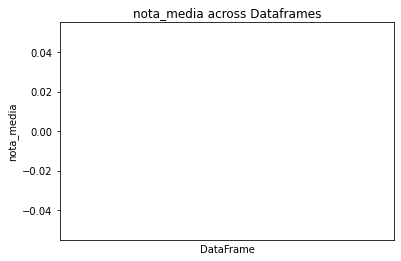

In [497]:
# Extract 'nota_media' values
nota_media_values = [dict_numeric_stats[key]['nota']['nota_media'] for key in dict_numeric_stats.keys()]

# Plotting
plt.bar(range(len(nota_media_values)), nota_media_values)
plt.xlabel('DataFrame')
plt.ylabel('nota_media')
plt.xticks(range(len(dict_numeric_stats)), dict_numeric_stats.keys())
plt.title('nota_media across Dataframes')
plt.show()


# Weather API

In [498]:
import requests

In [527]:
api_key = 'ff5f7420accc4535a4711638232706'
location = '-22.712629515340414, -47.6460788617793'
api_url = f'http://api.weatherapi.com/v1/current.json?key={api_key}&q={location}&aqi=yes'

response = requests.get(api_url)
response_json = response.json()

In [530]:
temp_c = response_json['current']['temp_c']
condition = response_json['current']['condition']['text']
humidity = response_json['current']['humidity']
feelslike_c = response_json['current']['feelslike_c']

temp_c

16.4

In [529]:
df_data_list_fred[['dia','hora_do_jogo']].head()

,dia,hora_do_jogo
35,2023-06-26,12:30:00
34,2023-06-21,21:45:00
32,2023-06-20,21:15:00
30,2023-06-20,12:14:00
27,2023-06-16,22:15:00


In [513]:
df_data_list_fred_teste = df_data_list_fred.copy()
# Convert 'dia' column to datetime
df_data_list_fred_teste['dia'] = pd.to_datetime(df_data_list_fred_teste['dia'])
# Convert 'hora_do_jogo' column to string
df_data_list_fred_teste['hora_do_jogo'] = df_data_list_fred_teste['hora_do_jogo'].astype(str)
# Concatenate 'dia' and 'hora_do_jogo' columns into a single datetime column
df_data_list_fred_teste['datetime'] = df_data_list_fred_teste['dia'].dt.date.astype(str) + ' ' + df_data_list_fred_teste['hora_do_jogo']
# Convert 'datetime' column to datetime
df_data_list_fred_teste['datetime'] = pd.to_datetime(df_data_list_fred_teste['datetime'])
# Drop the original 'dia' and 'hora_do_jogo' columns if needed
df_data_list_fred_teste = df_data_list_fred_teste.drop(['dia', 'hora_do_jogo'], axis=1)
df_data_list_fred_teste = df_data_list_fred_teste[['datetime']]
df_data_list_fred_teste['unix_timestamp'] = df_data_list_fred_teste['datetime'].apply(lambda x: x.timestamp()).astype(int)
df_data_list_fred_teste['rounded_datetime'] = df_data_list_fred_teste['datetime'].dt.strftime('%Y-%m-%d %H:00')

In [514]:
datetime = (df_data_list_fred_teste['datetime'].iloc[-1])
rounded_datetime = (df_data_list_fred_teste['rounded_datetime'].iloc[-1])
unix = (df_data_list_fred_teste['unix_timestamp'].iloc[-1])

In [515]:
print(datetime)
print(rounded_datetime)
print(unix)

2023-04-25 12:24:00
2023-04-25 12:00
1682425440


In [535]:
api_url = f'http://api.weatherapi.com/v1/history.json?key=ff5f7420accc4535a4711638232706=-22.712629515340414,-47.6460788617793&unixdt={unix}'
response = requests.get(api_url)
response_json = response.json()
response_json

{'error': {'code': 2008, 'message': 'API key has been disabled.'}}

In [531]:
lista_unix_jogados = list(df_data_list_fred_teste['unix_timestamp'])
dict_response_json = {}

for i, unix_item in enumerate(lista_unix_jogados):
  api_url = f'http://api.weatherapi.com/v1/history.json?key=ff5f7420accc4535a4711638232706=-22.712629515340414, -47.6460788617793&unixdt={unix_item}'
  response = requests.get(api_url)
  response_json = response.json()
  dict_response_json[f'response_{unix_item}'] = response_json

In [532]:
dict_response_json[f'response_{unix_item}']

{'error': {'code': 2008, 'message': 'API key has been disabled.'}}

In [533]:
dict_weather = {}
lista_datetimes_jogados = list(df_data_list_fred_teste['rounded_datetime'])

for datetime_item in lista_datetimes_jogados:
  for response in dict_response_json:
    response_element = dict_response_json[response]['forecast']['forecastday'][0]['hour']
    for i in range(1, 24):
      element = response_element[i]
      element_datetime = element['time']
      if element_datetime == datetime_item:
        temp_c = element['temp_c']
        condition = element['condition']['text']
        humidity = element['humidity']
        feelslike_c = element['feelslike_c']
        trimmed_key = response.replace('response_', '')
        dict_weather[trimmed_key] = {
        'datetime': datetime_item,
        'temp_c': temp_c,
        'condition': condition,
        'humidity' : humidity,
        'feelslike_c' : feelslike_c
        }

KeyError: 'forecast'

In [ ]:
df_data_list_fred_teste.head()

,datetime,unix_timestamp,rounded_datetime
34,2023-06-21 21:45:00,1687383900,2023-06-21 21:00
32,2023-06-20 21:15:00,1687295700,2023-06-20 21:00
30,2023-06-20 12:14:00,1687263240,2023-06-20 12:00
27,2023-06-16 22:15:00,1686953700,2023-06-16 22:00
26,2023-06-14 20:30:00,1686774600,2023-06-14 20:00


In [ ]:
date_unix = df_data_list_fred_teste['unix_timestamp'].max()
date = df_data_list_fred_teste['datetime'].max()

condition = dict_weather[str(date_unix)]['condition']
print("date:", date)
print("temp_c:", temp_c)

date: 2023-06-21 21:45:00
temp_c: 24.0


# Sugestões

- [x] **Total number of games played:** Count the number of rows in the dataframe.
- [x] **Average game rating:** Calculate the average value of the 'nota' column.
- [x] **Total calories burned:** Sum up the values in the 'calorias' column.
- [x] **Average playing time:** Calculate the mean of the 'tempo_jogado' column.
- [x] **Percentage of solo games:** Calculate the percentage of games where 'jogou_sozinho' is True.
- [x] **Average rest time between games:** Calculate the average value of the 'tempo_de_descanso' column.
- [x] **Weekly game count:** Group the dataframe by 'numero_da_semana' and count the number of games in each week.
- [x] **Average animo_pra_jogar:** Calculate the mean of the 'animo_pra_jogar' column.
- [x] **Distribution of game ratings:** Create a histogram to visualize the distribution of game ratings ('nota').
- [x] **Game duration trend over time:** Plot a line chart showing the trend of game durations over different dates.

For the streamlit dashboard:

- [ ] Create a bar chart to display the total number of games played for each player ('jogador').
- [x] Create a line chart to show the trend of game ratings ('nota') over time.
- [x] Create a pie chart to illustrate the percentage of solo games versus games played with others.
- [x] Create a scatter plot to plot the relationship between 'calorias' burned and 'tempo_jogado'.
- [x] Create a heatmap to display the correlation matrix of different columns in the dataframe.

Additional data collection:

- [ ] **Tracking shooting accuracy:** Record the number of shots taken and made during each game.
- [ ] **Tracking opponent's team details:** Collect information about the opposing team, such as their skill level, team composition, etc.
- [ ] **Tracking game locations:** Keep track of the different locations where games are played.
- [ ] **Tracking game outcomes:** Record whether the game was won or lost.
- [ ] **Tracking player performance:** Collect individual player statistics, such as points scored, rebounds, assists, etc.

Next steps:

- [ ] Perform exploratory data analysis to identify patterns, trends, and insights.
- [ ] Create more visualizations and charts to gain a better understanding of the data.
- [ ] Develop the Streamlit dashboard using the chosen visualizations and metrics.
- [ ] Continuously collect data from each game to keep the dashboard up to date.
- [ ] Enhance the dashboard and analysis based on feedback and new insights gained.

Remember to consider your specific goals and objectives while selecting metrics and developing the dashboard.
